# REGULARIZACIÓN

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc, animation
rc('animation', html='html5')

%matplotlib notebook

import importlib
import overfiting_helper as oh
#importlib.reload(oh)

### MLE (Maximun Likelihood Estimation)

Dada una secuencia de muestras $x_1,x_2, ..., x_n$, queremos encontrar los paramatros $\theta$ que maximizan la funcion de densidad de probabilidad evaluada en cada una de nuestras muestras $x_1,x_2, ..., x_n$:

$\hat\theta = arg \max\limits_{\theta} p(x_1, x_2, ..., x_n|\theta)$

Suponemos que las muestras de X fueron generadas i.i.d (Independientes e Identicamente Distribuidas)

$
\hat\theta = arg \max\limits_{\theta} p(x_1|\theta) p(x_2|\theta) ... p(x_n|\theta)$

Tenemos que derivar e igualar a cero respecto a cada parametro para encontrar el minimo, es decir, igualar el gradiente a cero:

$\nabla_\theta \prod p(x_i\mid\theta) = 0$

**log-lokilihood**: Un detalle a tener en cuenta es que la productoria se puede reemplazar por una suma aplicando logaritmo que es una funcion monotona creciente por lo que no cambiaria el minimo. 


### Ejemplo con funcion gaussiana multivariable

- **Datos**: Tenemos la data X que queremos modelizar
- **Modelo**: Modelo probabilistico; Definimos que el modelo para X es una V.A Gaussiana con parametros $\theta = [\vec{\mu}$, $\Sigma$] 
- **Inferencia**: Estimar los parametros del modelo propuesto

Si resolvemos, obtendremos lo siguiente:

$\hat\mu_{ML} = \frac{1}{n} \sum_{i=1}^n{x_i}$

$\hat\Sigma_{ML} = \frac{1}{n} \sum_{i=1}^n{(x_i-\hat\mu_{ML})(x_i-\hat\mu_{ML})^T}$

Este modelo encuentra los valores de los parametros en funcion de las muestras, pero considera a los parametros as u vez como V.A. Si calculamos sus medias, obtendremos:

$\mathbb{E}[\hat\mu_{ML}] = \vec{\mu}$ 

$\mathbb{E}[\hat\Sigma_{ML}] = \frac{N-1}{N}\Sigma$ 

**Nota**: En este caso con ML obtenemos un estimador no polarizado para la media y uno polarizado para la matriz de covarianza

### Ejemplo con gausiana de una variable

In [2]:
# Defino V.A X con distribucion gaussiana de media cero y varianza 1
samples = 10000; mu = 0; var = 1
X_ML = np.random.normal(mu,var,samples)

# Media y varianza estimadas:
mu_est = X_ML.mean(); var_est = X_ML.var()
print('media:',mu_est, '- varianza:',var_est)

media: 0.0170228170505 - varianza: 0.986656515743


<IPython.core.display.Javascript object>


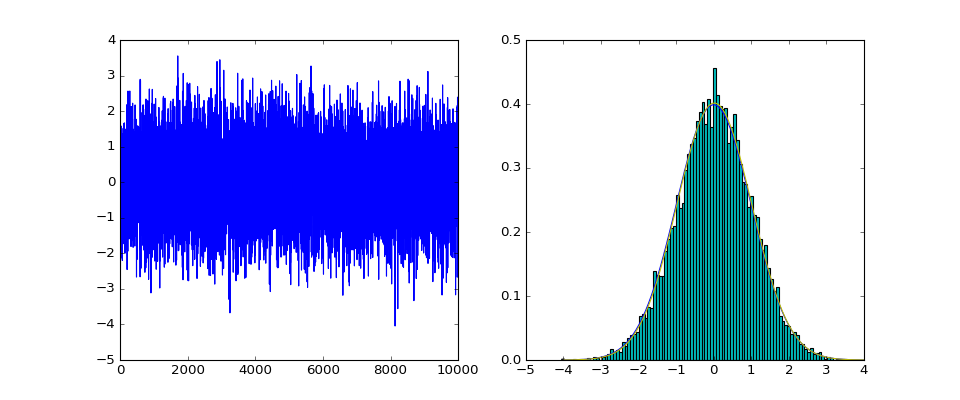

In [3]:
# Grafico muestras e histograma para analizarlas
lin, gauss_teorica = oh.gaussian(mu, var, -4, 4, 100)
lin, gauss_est = oh.gaussian(mu_est, var_est, -4, 4, 100)
bins = 100; f, ([ax1, ax2]) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(12, 5))
ax1.plot(X_ML); ax2.hist(X_ML,bins, normed=1, color = 'c'); ax2.plot(lin, gauss_teorica, color = 'b'); 
ax2.plot(lin, gauss_est, color = 'y');
plt.show()

<IPython.core.display.Javascript object>


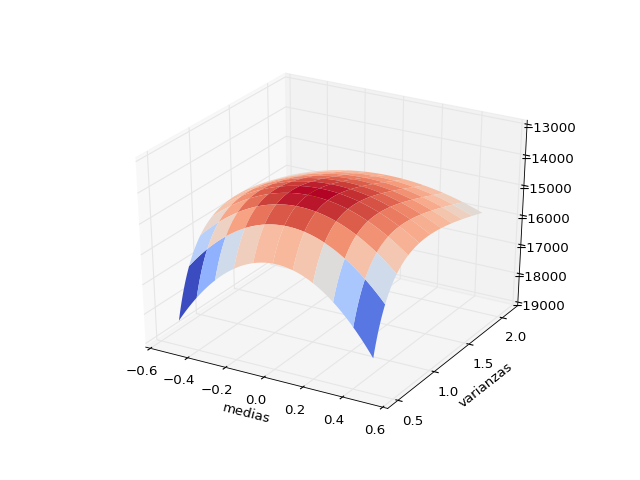

In [4]:
mus, variances, likelihood = oh.plot_likelihood(X_ML, mu_est, var_est)

### Regresión Lineal (Least-Squares solution)

$y_i \approx f(x_i;w_0, w_1, ..., w_n) = w_0 + w_1x_{i1} + ... + w_nx_{in}$
- **Datos**: Tenemos la data X e Y que queremos modelizar
- **Modelo**: Modelo deterministico; Definimos un modelo lineal
- **Inferencia**: Estimar los parametros $\theta = [w_0, w_1, ..., w_n]$

Loss function or Objective function:

$L = \sum_{i=1}^n{(f(x_i;w_0, w_1, ..., w_n)-y_i)^2}$

Queremos encontrar los valores de $w_i$'s que minimizan esta ecuacion

$w_{LR} = arg \min\limits_{w_i} \sum_{i=1}^n{(f(x_i;w_0, w_1, ..., w_n)-y_i)^2}$

Derivando e igualando a cero se obtienen los parametros (Least-Squares solution) - Notacion matricial

$w_{LS} = (X^TX)^{-1}X^Ty$

$\hat{y} = Xw_{LS}$

### Ejemplo lineal:
$y = w_0 + w_1x$

<IPython.core.display.Javascript object>


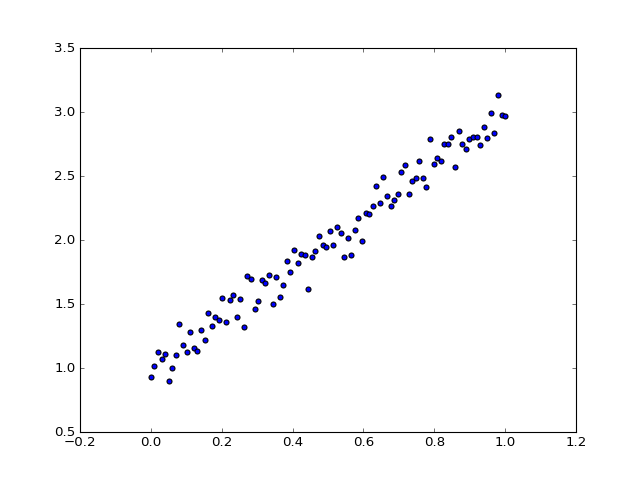

[ 0.98138831  2.01692408]


In [5]:
w0 = 1; w1 = 2; N = 100
x = np.linspace(0,1,N)
y = w0 + w1*x + np.random.normal(0,0.1, len(x))#.reshape(len(x),1)
plt.scatter(x,y)

X = np.ones((x.shape[0],2))
X[:,1] = x.flatten()
w_est = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(w_est)

<IPython.core.display.Javascript object>


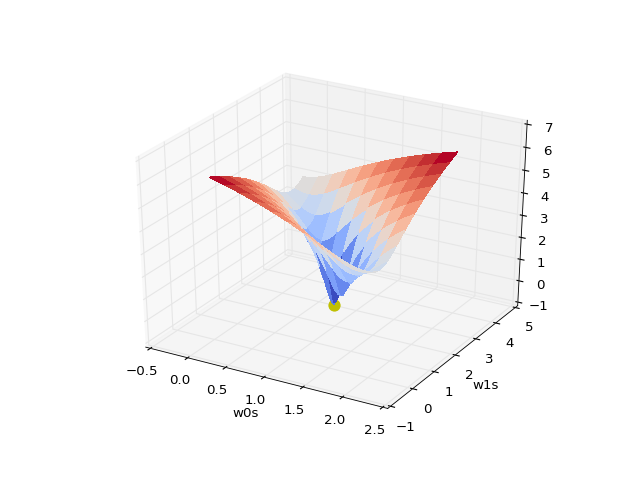

In [7]:
_,_, loss = oh.plot_loss_function(X, y, w_est[0],  w_est[1])

### Maximum Likelihood (vision probabilistica de Least-Squares)

Si suponemos una densidad de probabilidad conjunta en n dimensiones con: 

$\Sigma = \sigma^2I$ y media $\mu = Xw$

$p(y\mid\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}}exp(-\frac{1}{2\sigma^2}(y-\mu)(y-\mu)^T)$

Donde no conocemos w que es el **ground truth**

Ahora encontremos el **Maximun Likelihood** de $p(y|\mu,\sigma^2)$ con el vector w como parametro, es decir, el valor del vector w que maximiza la funcion $p(y|\mu,\sigma^2)$

$w_{ML}= arg \max\limits_{w} ln(p(y\mid\mu = Xw,\sigma^2))$

desarrolando queda:

$w_{ML}= arg \max\limits_{w} -\frac{1}{2\sigma^2}\| y-Xw \| ^2 $

$w_{LS}= arg \min\limits_{w} \| y-Xw \| ^2 $

Misma solucion que LS (Least Squares)

Distintas formas de ver el modelo:
- $y_i = x_i^Tw + \epsilon_i$, donde $\epsilon_i$ son V.A gaussianas i.i.d con media zero y varianza $\sigma^2$ -> $N(0,\sigma^2)$
- $y_i$ son V.A independientes con distribucion $N(x_i^Tw,\sigma^2)$
- $y$ es $N(Xw,\sigma^2I)$, notacion matricial

Recordar que $w_{ML}$ es una V.A que estimamos segun la ecuacion superior. Como V.A, tiene una media y una varianza. Es decir, las medias estimadas $Xw_{ML}$ **no** son iguales a $Xw$

En otras palabras, segun este modelo, nosotros estimamos $w_{ML}$ en funcion de muestrar $y$. Si volvemos a muestrar $y$, obtendremos valores $w_{ML}$ diferentes. Si esto lo hacemos "infinitas veces", entonces la media sera $w$ debido a que $w_{ML}$ es un estimador no polarizado:

$\mathbb{E}[w_{ML}] = \mathbb{E}[(X^TX)^{-1}X^Ty] = (X^TX)^{-1}X^T\mathbb{E}[y] = (X^TX)^{-1}X^TXw = w$

$Var[w_{ML}] = \sigma^2(X^TX)^{-1}$ 


### Ejemplo (Aproximacion polinomial)

$y_i \approx f(x_i;w_0, w_1, ..., w_n) = w_0 + w_1x_{i1} + ... + w_nx_{in}$

$x_{i1} = x, x_{i2} = x^2, ..., x_{in} = x^n$

$y_i \approx f(x_i;w_0, w_1, ..., w_n) = w_0 + w_1x + w_2x^2 + ... + w_nx^n$

### Tenemos un conjunto de muestras:

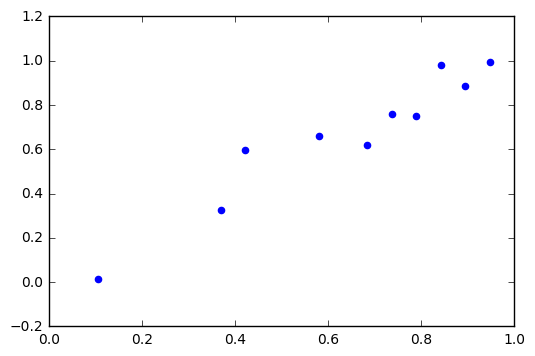

In [30]:
N = 20
mean = 0; sigma = 0.1
X_LS, Y_LS, X_LS_test, Y_LS_test = oh.get_polynomial_set([0,1, 0, 0], mean = mean, sigma = sigma, N = N, ratio = 0.5)

#X_LS, Y_LS, X_LS_test, Y_LS_test = np.load('regression_dataset.npy')
plt.scatter(X_LS, Y_LS, color = 'b')
#plt.scatter(X_LS_test, Y_LS_test, color = 'y')
plt.show()

In [28]:
np.save('regression_dataset', [X_LS, Y_LS, X_LS_test, Y_LS_test])

/Users/julianganzabal/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.642538252505586e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


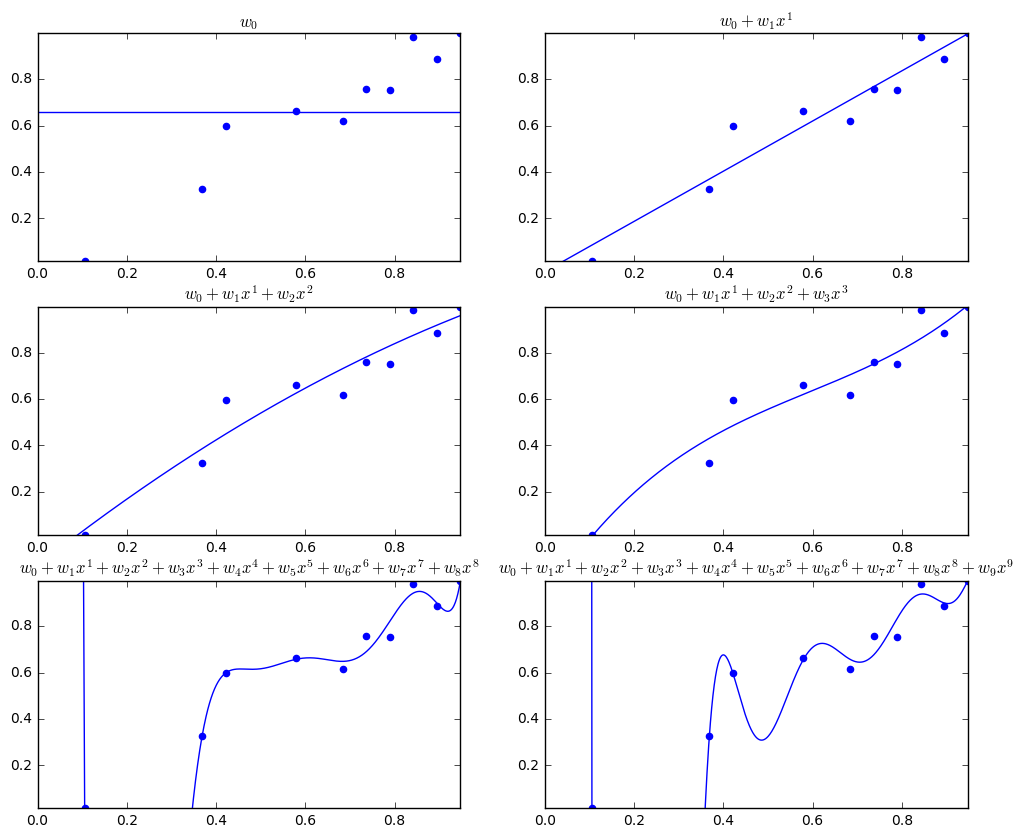

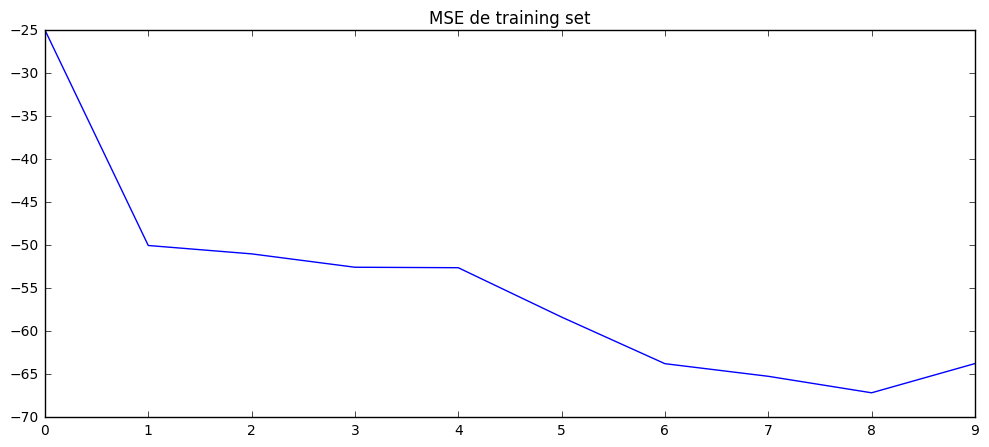

In [34]:
orders = [0, 1 ,2, 3, 8,9]
max_order = 9
# model = oh.get_parameters_polinomial_model_linear,
MSEs, MSEs_test = oh.get_plot_polinomial_estimations(X_LS, Y_LS, X_LS_test, Y_LS_test, model = oh.get_parameters_polinomial_model_linear, N=N, orders = orders, normalize = True, max_order = max_order, plot_test = False)
oh.plot_MSEs([MSEs], None)

<IPython.core.display.Javascript object>


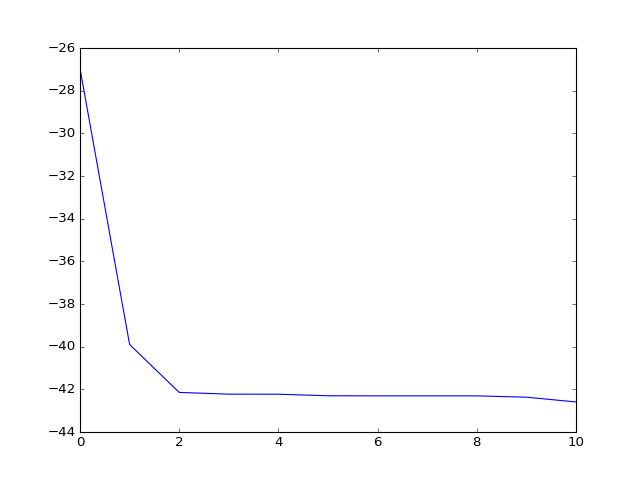

In [11]:
importlib.reload(oh)
losses= oh.get_loss_polys(X_LS,Y_LS, oh.get_parameters_polinomial_model_linear, max_order, lamb = 0, normalize = True, fit_intercept=False)
plt.plot(10*np.log(losses))

fig size: 72.0 DPI, size in inches [ 6.  4.]


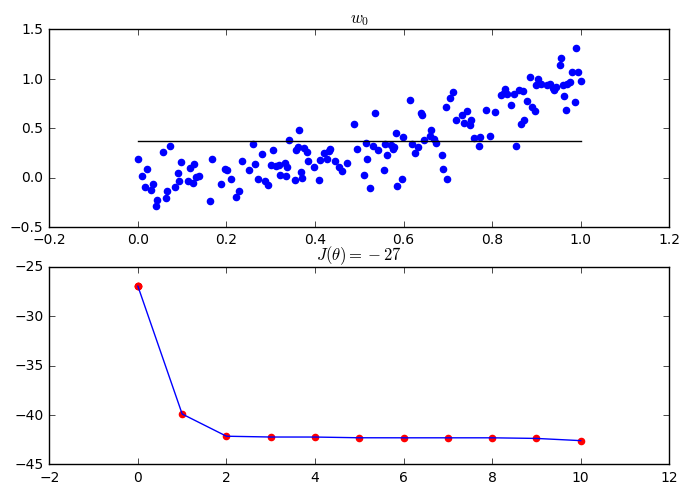

In [12]:
%matplotlib inline
from matplotlib import rc, animation
importlib.reload(oh)
anim = oh.get_polinomial_animation(X_LS, Y_LS, X_LS_test, Y_LS_test, model = oh.get_parameters_polinomial_model_linear, N=N, normalize = True, max_order = max_order, plot_test = False, interval = 1000)
anim

## Cual es la mejor estimacion?

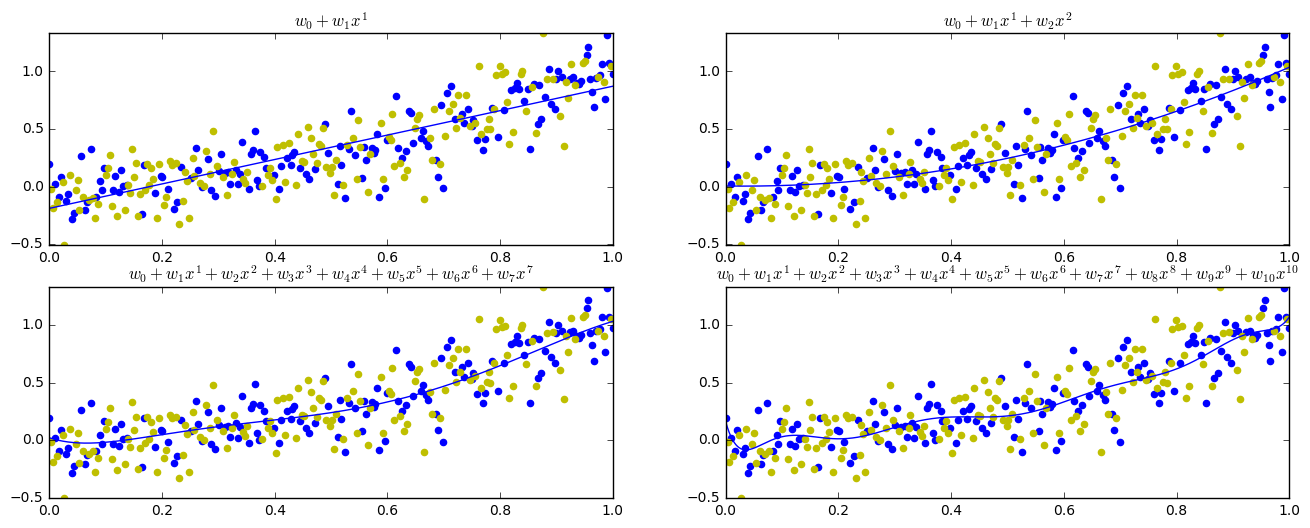

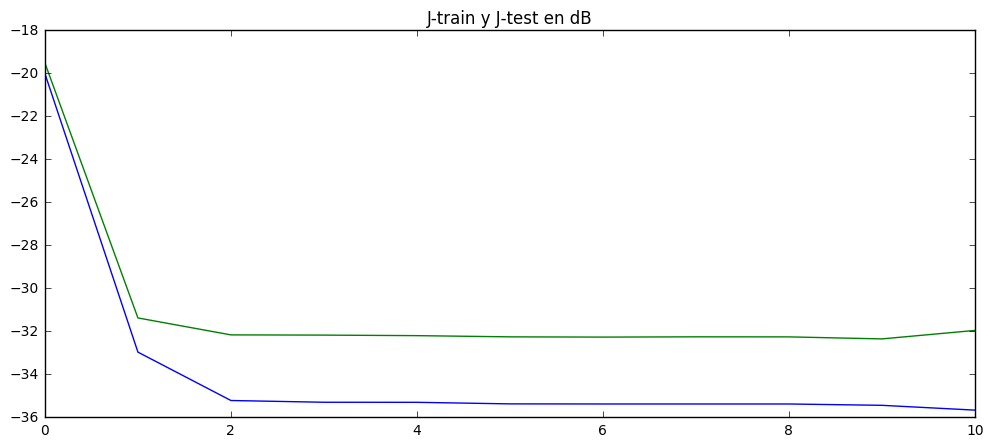

In [13]:
importlib.reload(oh)
MSEs, MSEs_test = oh.get_plot_polinomial_estimations(X_LS, Y_LS, X_LS_test, Y_LS_test, model = oh.get_parameters_polinomial_model_linear, N=N, orders = [1, 2, 7, 10], normalize = True, max_order = max_order, plot_test = True, figsize=(16, 6))
oh.plot_MSEs([MSEs,MSEs_test],None, title = 'J-train y J-test en dB')

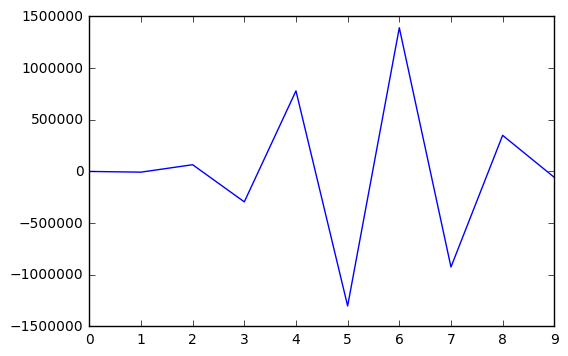

In [35]:
ws_11, _,_,_= oh.get_parameters_polinomial_model(X_LS,Y_LS, N = 9, lamb = 0, normalize = True)
plt.plot(ws_11)

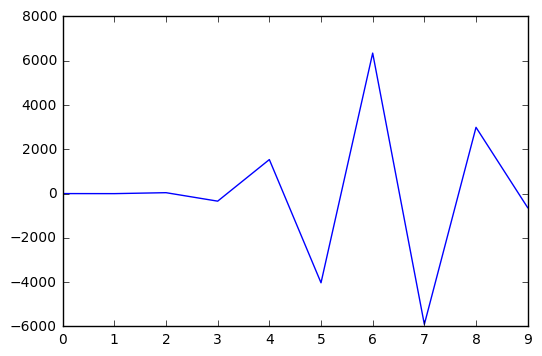

### En este paso parece muy simple determinar cual es el mejor caso, veamos otro ejemplo:

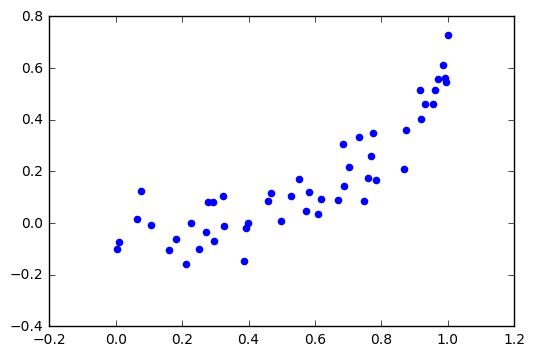

In [39]:
N= 200
X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2 = oh.get_polynomial_set([0,0,0, 0.4, 0.2], mean = 0, sigma = 0.075, N = N, ratio = 0.25)

plt.scatter(X_LS_2, Y_LS_2, color = 'b')
#plt.scatter(X_LS_test, Y_LS_test, color = 'y')
plt.show()

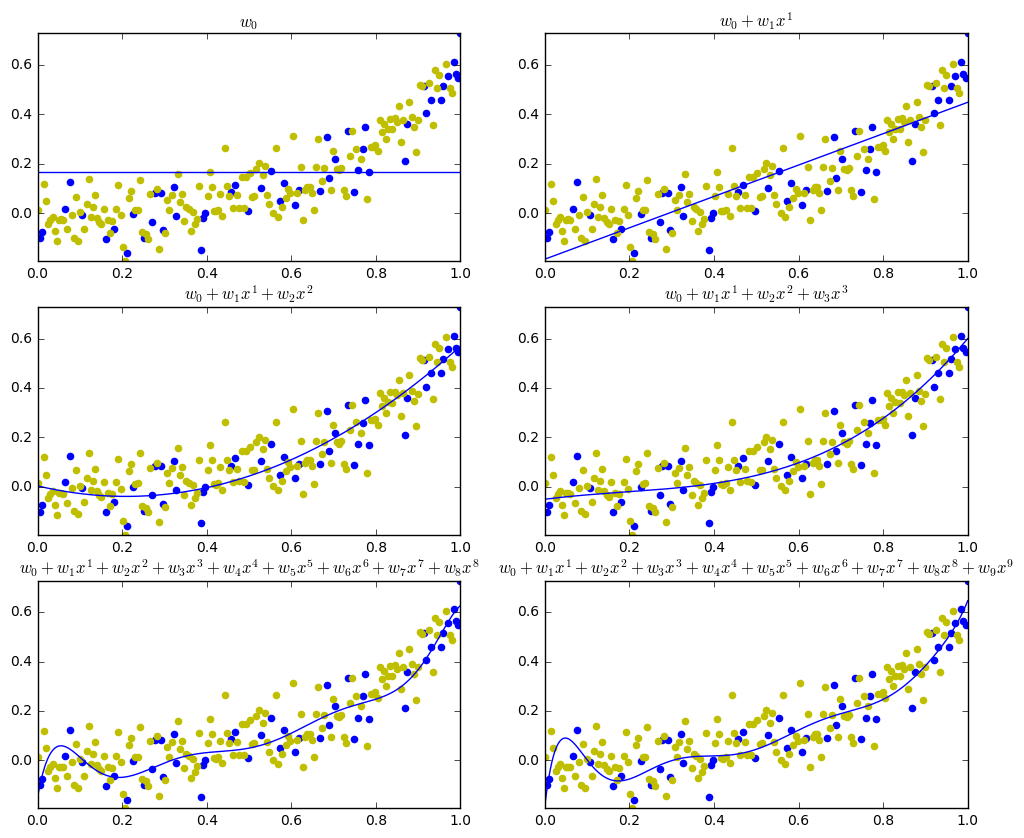

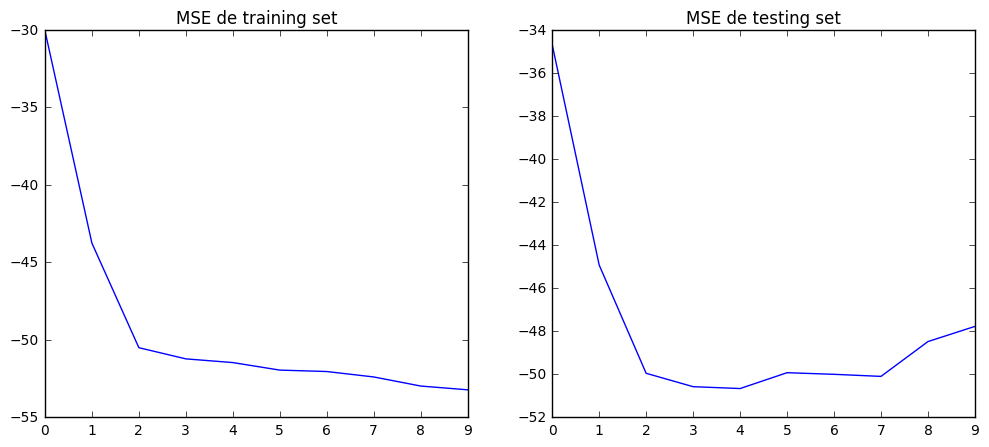

In [40]:
MSEs_2, MSEs_test_2 = oh.get_plot_polinomial_estimations(X_LS_2, Y_LS_2, X_LS_test_2, Y_LS_test_2, model = oh.get_parameters_polinomial_model_linear, N=N, orders = orders, normalize = True, max_order = max_order, plot_test = True)
oh.plot_MSEs([MSEs_2], [MSEs_test_2])

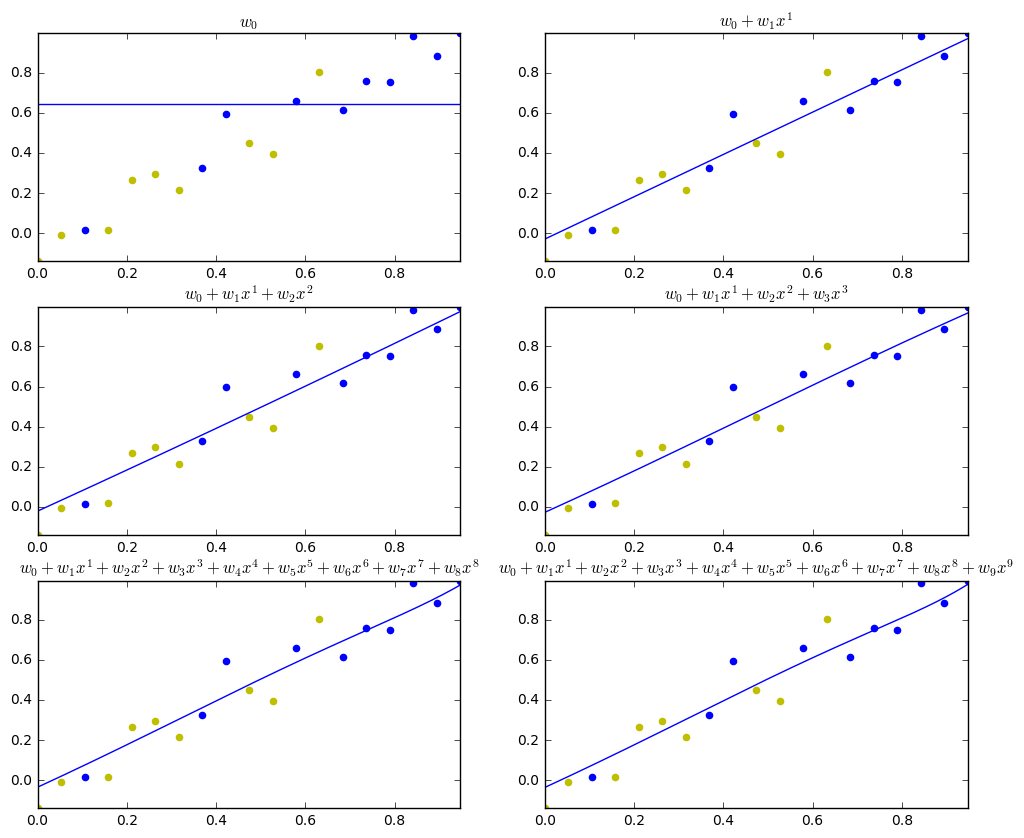

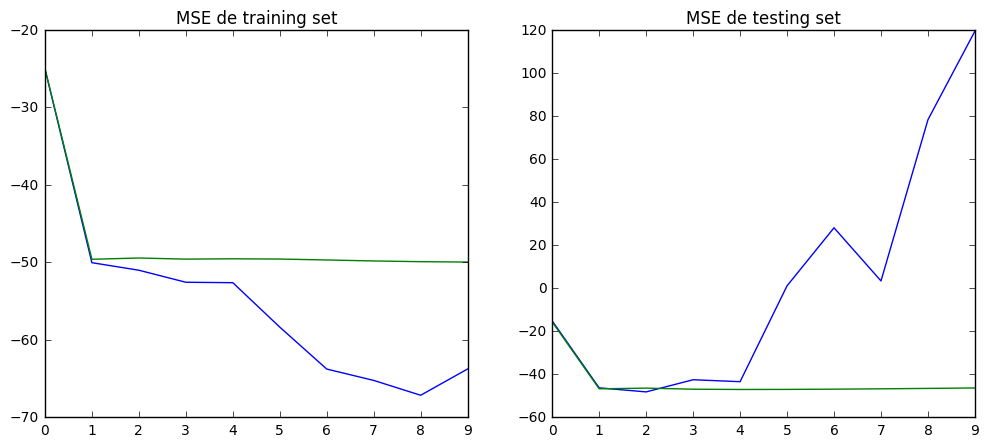

In [41]:
lamb_RR = 0.25
MSEs_RR, MSEs_test_RR = oh.get_plot_polinomial_estimations(X_LS_2, Y_LS_2, X_LS_test, Y_LS_test, model=oh.get_parameters_polinomial_model_linear, N=N, orders = orders, lamb = lamb_RR, normalize = True, max_order = max_order, plot_test = True)
oh.plot_MSEs([MSEs, MSEs_RR], [MSEs_test, MSEs_test_RR])

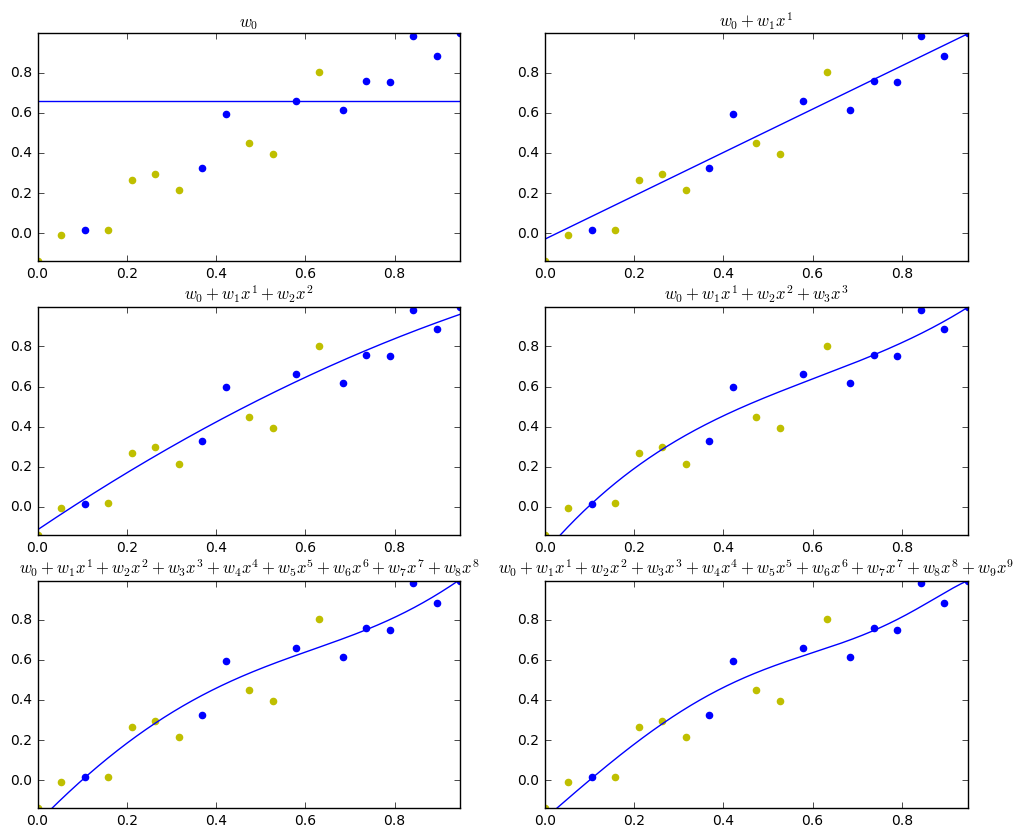

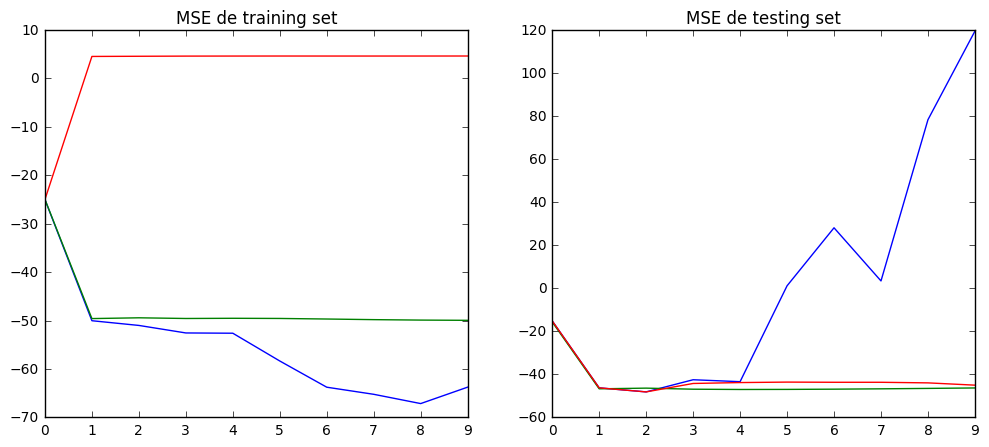

In [42]:
importlib.reload(oh)
lamb_LASSO = 0.0001
MSEs_LASSO, MSEs_test_LASSO = oh.get_plot_polinomial_estimations(X_LS, Y_LS, X_LS_test, Y_LS_test, model = oh.get_parameters_polinomial_model_lasso,N=N, orders = orders, lamb = lamb_LASSO, normalize = True, max_order = max_order, fit_intercept=False)
oh.plot_MSEs([MSEs, MSEs_RR, MSEs_LASSO], [MSEs_test, MSEs_test_RR, MSEs_test_LASSO])

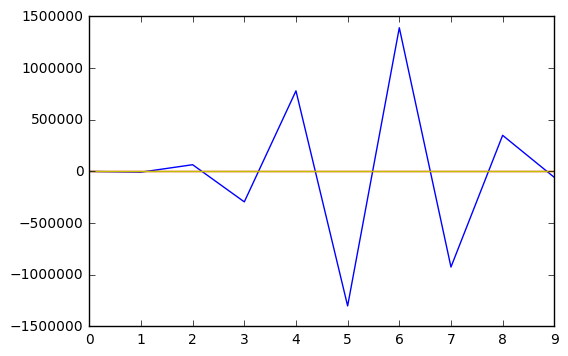

No regularization: 5.30791402675e+12 [[  6.59277586e-01]
 [ -6.80135236e+03]
 [  6.51486599e+04]
 [ -2.94367538e+05]
 [  7.79806391e+05]
 [ -1.30149166e+06]
 [  1.39059591e+06]
 [ -9.25089030e+05]
 [  3.49510546e+05]
 [ -5.73438755e+04]]
l2 regularization: 0.487778360385 [[ 0.64319765]
 [ 0.26032986]
 [ 0.05596587]
 [-0.02096613]
 [-0.03502051]
 [-0.02507158]
 [-0.00911667]
 [ 0.00541727]
 [ 0.01605405]
 [ 0.02250653]]
l1 regularization: 0.28829042236 [ 0.          0.47928547 -0.21749208 -0.07850891 -0.          0.
  0.05574485  0.04474283  0.          0.        ]


In [43]:
ws_11, _,_,_= oh.get_parameters_polinomial_model(X_LS,Y_LS, N = 9, lamb = 0, normalize = True)
ws_11_l2, _,_,_= oh.get_parameters_polinomial_model(X_LS,Y_LS, N = 9, lamb = lamb_RR, normalize = True, fit_intercept=False)
ws_11_l1, _,_,_= oh.get_parameters_polinomial_model_lasso(X_LS,Y_LS, N = 9, lamb = lamb_LASSO, normalize = True, fit_intercept=True)
plt.plot(range(len(ws_11)),ws_11,color='b')
plt.plot(range(len(ws_11)),ws_11_l2, color='r')
plt.plot(range(len(ws_11)),ws_11_l1, color='y')
plt.show()
print('No regularization:',(ws_11**2).sum(), ws_11)
print('l2 regularization:',(ws_11_l2**2).sum(), ws_11_l2)
print('l1 regularization:',(ws_11_l1**2).sum(), ws_11_l1)

### Entonces, dado que la mejor solucion para los w's es la calculada. Podemos decir que los valores de w que obtendremos seran los mejores?
- No necesariamente... 
- Si la varianza es muy grande, probablemente los valores obtenidos no sean los "mejores"
- No podemos asegurar que la solucion de ML esta cerca de la solucion real

### Ridge regression

- Aclarar que necesita preprocesamiento (normalizacion), para que no pese mas un peso que otro ya que lambda es el mismo para todos

Ponemos una restriccion ahora para los valores de ws, es decir que poseen una distribucion a priori
N(0,I*lambda)

https://courses.edx.org/courses/course-v1:ColumbiaX+CSMM.102x+1T2017/courseware/37a5439b200647678e36923d5483cdf6/0d17497317e24a5aabe97ac4cb493f08/ minuto 14, buen ejemplo de bias - variance trade off

https://courses.edx.org/courses/course-v1:ColumbiaX+CSMM.102x+1T2017/courseware/37a5439b200647678e36923d5483cdf6/0d17497317e24a5aabe97ac4cb493f08/
explicacion probabilistica de ridge regresion

In [ ]:
MSEs_RR, MSEs_test_RR = oh.get_plot_polinomial_estimations(X_LS, Y_LS, X_LS_test, Y_LS_test, N=N, orders = orders, lamb = 0.000001, normalize = True, max_order = 11)

In [ ]:
plot_MSEs([MSEs, MSEs_RR], [MSEs_test, MSEs_test_RR])

## Sparsity overdetermined systems L1 regularization:
https://courses.edx.org/courses/course-v1:ColumbiaX+CSMM.102x+1T2017/courseware/b30810a7eb6242d4b128fbd1bd880473/e1b27a0dc51243cc8ec8aee156eab875/

In [ ]:
def get_weights_var_ML(X, Y, sigma, N = 1):
    X_ones = np.ones((X.shape[0], X.shape[1]+N))
    X_ones[:,1:] = X
    for i in range(N-1):
        X_ones[:,i+2:] = X**(i+2)
        
    var = np.linalg.inv(np.dot(X_ones.T,X_ones)) 
    theta = np.linalg.inv(np.dot(X_ones.T,X_ones)).dot(X_ones.T).dot(Y)
    return sigma*var, theta

for i in orders:
    var, ws = get_weights_var_ML(X_LS, Y_LS, sigma, N = i)
    print(np.sqrt(var.diagonal()))

In [ ]:
importlib.reload(oh)
MSEs_LASSO, MSEs_test_LASSO = oh.get_plot_polinomial_estimations(X_LS, Y_LS, X_LS_test, Y_LS_test, model = oh.get_parameters_polinomial_model_lasso,N=N, orders = orders, lamb = 0.1, normalize = True, max_order = 11, fit_intercept=False)

In [ ]:
plot_MSEs([MSEs, MSEs_RR, MSEs_LASSO], [MSEs_test, MSEs_test_RR, MSEs_test_LASSO])